In [1]:
import nltk
import json
from tqdm import tqdm
import time
import re
from textblob import TextBlob
import pandas as pd

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
nltk.download('stopwords')
from nltk.corpus import stopwords
# stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gkhanna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
file_d = []
reviews_sent = []
reviews_neg_sent = []
reviews_pos_sent = []
reviews_str = ""
reviews_pos_str = ""
reviews_neg_str = ""

In [5]:
# file = '/Users/gkhanna/Downloads/by_helpful.json'
file = '/Users/gkhanna/Downloads/reviews_Home_and_Kitchen_5.json'

Reading "count" of the file for faster experiments
count = 0 pulls in all data

In [6]:
# Reading count number of JSON lines from the file
count = 0
n = 0
with open(file, "r") as f:
    for line in tqdm(f):
        file_d.append(json.loads(line))
        n =  n + 1
        if count > 0 and n == count:
            break
    


551682it [00:07, 73328.42it/s]


In [7]:
# Checking the structures
print(len(file_d))


551682


In [8]:
file_d[1]

{'reviewerID': 'A1JVQTAGHYOL7F',
 'asin': '0615391206',
 'reviewerName': 'Michelle Dinh',
 'helpful': [0, 0],
 'reviewText': 'I bought this zoku quick pop for my daughterr with her zoku quick maker. She loves it and have fun to make her own ice cream.',
 'overall': 5.0,
 'summary': 'zoku',
 'unixReviewTime': 1403049600,
 'reviewTime': '06 18, 2014'}

Read in reviews that correspond to the list of ASIN's (Amazon product ID's) selected. 
Choosing the ASIN that has ~ 1000 reviews from the EDA

In [9]:
# ASIN corresponding to the Iron Skillet
pl = 'B00006JSUA'
# Tumbler
# pl = 'B000QFDNP8'

In [10]:
# ASIN's for Iron Skillets from Jey's web scraping
# pl = ['B075MRX5N3', 'B06XT6GZ9V', 'B00006JSUA', 'B00006JSUA', 'B07GKZXS2T', 'B000VTOG78', 'B00X4WQMAS', 'B00G2XGC88', 'B073Q8P6CQ', 'B073Q8DY3F']

In [11]:
# Trying out the ASIN's for toothbrush holder
# pl = ['B078GVMVRH', 'B078GVH2VJ', 'B00SX07354', 'B00CC6XSRC', 'B0777SKKBL', 'B072YVWBXH', 'B01AKGRTUM', 'B07CMHRZRT', 'B07CMHRZS2', 'B073Q58L6Q']

In [12]:
# Getting the reviews out of the dictionary into lists
count = 0
n = 0
filter_l = pl
for r in tqdm(file_d):
    if (filter_l and (r['asin'] == filter_l)) or not filter_l:
        reviews_sent.append(r['reviewText'])
        if ((r['overall'] == 1.0) or (r['overall'] == 2.0)):
            reviews_neg_sent.append(r['reviewText'])
        else:
            reviews_pos_sent.append(r['reviewText'])
        n =  n + 1
        if count > 0 and n == count:
            break

100%|██████████| 551682/551682 [00:00<00:00, 1413387.70it/s]


In [13]:

print(len(reviews_sent))
print(reviews_sent[0])

1064
Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of cast iron and have pans that you can pass down to your children, without all those unknown chemicals that are such a part of pans for the last few decades.


In [14]:
print(len(reviews_pos_sent))
print(reviews_pos_sent[0])

1022
Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of cast iron and have pans that you can pass down to your children, without all those unknown chemicals that are such a part of pans for the last few decades.


In [15]:
print(len(reviews_neg_sent))
print(reviews_neg_sent[0])

42
I've always bought the regular Lodge skillets and loved them.  Went with the pre-seasoned this time because I wanted this size.Wow, what a pain.  I picked the best I could find from a stack on a big-box store shelf, so I know I didn't get a lemon (unless the whole batch was badly pre-seasoned!).  The coating flaked off, got my hands black, and smelled really rusty.  No WAY I could cook with it that way!It has taken me about five rounds of boiling soapy water and then vinegar and water to get most of that nasty coating off of there with a steel scurbber.  (Then I seasoned by coating with oil and heating in the oven for 20 minutes.I'm still wary of that residue.  Never have I seen (and smelled) so much rust (trapped UNDER the coating) come off a skillet--new or badly stored in a garage.  This was horrible.I'm used to cast iron, for sure.  Been using good old American-made Lodge skillets for years, plus we regularly use a big cast iron wok imported from China.So, I'm giving only two st

### Bi-Grams and Tri-Grams TFIDF

In [16]:
vectorizer_pos = TfidfVectorizer(ngram_range=(2,3))
tf_pos = vectorizer_pos.fit_transform(reviews_pos_sent)
feature_names_pos = vectorizer_pos.get_feature_names()
phrase_scores_pos = vectorizer_pos.idf_ 
names_scores_df_pos = pd.DataFrame({'feature_names':feature_names_pos})
names_scores_df_pos['phrase_scores'] = pd.DataFrame(phrase_scores_pos)                                             

In [17]:
names_scores_df_pos

,feature_names,phrase_scores
0,00 and,7.237348
1,00 and you,7.237348
2,00 dollars,7.237348
3,00 dollars hard,7.237348
4,00 lid,7.237348
5,00 lid most,7.237348
6,00 on,7.237348
7,00 on amazon,7.237348
8,0000 then,7.237348
9,0000 then coat,7.237348


In [18]:
names_scores_df_pos.size

251156

In [19]:
names_scores_df_pos[names_scores_df_pos.feature_names == 'hot water']

,feature_names,phrase_scores
45180,hot water,3.667815


In [20]:
names_scores_df_pos.sort_values(by='phrase_scores')

,feature_names,phrase_scores
18990,cast iron,1.627876
47138,in the,2.346998
52630,it is,2.354546
106819,this is,2.492415
70058,of the,2.583387
107100,this pan,2.602619
72028,on the,2.617289
102690,the pan,2.657495
49243,iron skillet,2.726488
6152,and it,2.771439


In [21]:
vectorizer_neg = TfidfVectorizer(ngram_range=(2,3))
tf_neg = vectorizer_neg.fit_transform(reviews_neg_sent)
feature_names_neg = vectorizer_neg.get_feature_names()
phrase_scores_neg = vectorizer_neg.idf_ 
names_scores_df_neg = pd.DataFrame({'feature_names':feature_names_neg})
names_scores_df_neg['phrase_scores'] = pd.DataFrame(phrase_scores_neg)                                             

In [22]:
names_scores_df_neg.size

15970

In [23]:
# summarize(reviews_neg_sent[0], .8)

In [24]:
# Had to install spacy and neuralcoref
# import spacy # version 2.1.3
# import neuralcoref # version 4.0
from textblob import TextBlob

In [25]:
# nlp = spacy.load('en_core_web_sm')

In [26]:
def extractSubjectiveFromString(review):
    """
    Input: entire review document (str)
    Output: shortened review document with only subjective sentences
    """
    sent_list = nltk.sent_tokenize(review)
    output = ""  # output string
    for sent in sent_list:
        result = TextBlob(sent)
        if result.sentiment[1] > 0.5:  # keep sentences with sentiment > 0.25
            output += sent+" "
    return output

def extractSubjective(sent_list):
    """
    Input: A list of sentences
    Output: shortened review document with only subjective sentences
    """
    
    output = []  # output string
    for sent in sent_list:
        result = TextBlob(sent)
        if result.sentiment[1] > 0.5:  # keep sentences with sentiment > 0.25
            output.append(sent)
    return output

# spacy
# def replacePronouns(review):
#     """
#     Input: entire review document (str), multiple sentence_scores
#     Output: string, modified review with pronouns replaced.
#     """

#     # create spacy model
#     # nlp = spacy.load('en_core_web_sm')
#     # add neuralcoref to spacy model
#     neuralcoref.add_to_pipe(nlp, greedyness=0.50, max_dist=10)

#     pn = nlp(review)  # pn = pronoun doc
#     # print("has coreferences?  {}".format(pn._.has_coref))
#     # print("Coreferences:")
#     # print(pn._.coref_clusters)

#     return pn._.coref_resolved



In [27]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"did n't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}


In [28]:
def clean(text, remove_stopwords = False):
    '''Remove unwanted characters, stopwords, and format the text to create fewer nulls'''

    # Convert words to lower case
    text = text.lower()

    # Replace contractions with their longer forms
    text = text.split()
    new_text = []
    for word in text:
        if word in contractions:
            new_text.append(contractions[word])
        else:
            new_text.append(word)
    text = " ".join(new_text)

    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', ' ', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', ' ', text)
    text = re.sub(r'["\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)

    # Optionally, remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    return text

In [29]:
# Experiments on the reviews
# extractSubjective(reviews_sent)

In [30]:
# extractSubjective(reviews_neg_sent[0])

In [31]:
# replacePronouns(reviews_neg_sent[0])

In [32]:
# Getting reviews into strings
reviews_str = " ".join(s for s in reviews_sent)


In [33]:
reviews_pos_str = " ".join(s for s in reviews_pos_sent)
reviews_neg_str = " ".join(s for s in reviews_neg_sent)

In [34]:
print(len(reviews_str))
print(len(reviews_pos_str))
print(len(reviews_neg_str))

599426
573578
25847


In [35]:
print(reviews_str[:100])
print(reviews_pos_str[:100])
print(reviews_neg_str[:100])

Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of c
Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of c
I've always bought the regular Lodge skillets and loved them.  Went with the pre-seasoned this time 


In [36]:
# reviews_str = clean(reviews_neg_str)
# reviews_pos_str = clean(reviews_pos_str)
# reviews_neg_str = clean(reviews_neg_str)

Summarizing before doing anything else with the review strings
We'll skip summarization as there's danger of losing information

In [37]:
from gensim.summarization import summarize

In [38]:
# reviews_str = summarize(reviews_str, ratio=.5)
# reviews_pos_str = summarize(reviews_pos_str, ratio = .5)
# reviews_neg_str = summarize(reviews_neg_str, ratio = .5)

In [39]:
print(len(reviews_str))
print(len(reviews_pos_str))
print(len(reviews_neg_str))

599426
573578
25847


Separating out sentences into a list
PunktSentenceTokenizer is customized to separate sentences on a few extra words and characters as wel

In [40]:
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktLanguageVars
'''We customize the ReviewLangVars class to separate sentences based on some additional keywords'''


class ReviewLangVars(PunktLanguageVars):
    # sent_end_chars = ('pros:', 'cons:', '[','][','.','?','!')
     sent_end_chars = ('pros:', 'cons:', '[', '][', '.' ,'?', '!', ']' )
    
sent_tokenizer1 = PunktSentenceTokenizer(lang_vars = ReviewLangVars())
# sent_tokenizer1 = PunktSentenceTokenizer()
sent_fullreview = sent_tokenizer1.tokenize(reviews_str)
sent_neg_review = sent_tokenizer1.tokenize(reviews_neg_str)
sent_pos_review = sent_tokenizer1.tokenize(reviews_pos_str)

In [41]:
# This are the original sentences tokenized
print(sent_fullreview[0])
print(len(sent_fullreview))

Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of cast iron and have pans that you can pass down to your children, without all those unknown chemicals that are such a part of pans for the last few decades.
6641


In [42]:
# This are the negative sentences tokenized
print(sent_neg_review[0])
print(len(sent_neg_review))

I've always bought the regular Lodge skillets and loved them.
265


In [43]:
# This are the positive sentences tokenized
print(sent_pos_review[0])
print(len(sent_pos_review))

Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of cast iron and have pans that you can pass down to your children, without all those unknown chemicals that are such a part of pans for the last few decades.
6376


In [44]:
# sent_pos_subj = extractSubjective(sent_pos_review)

In [45]:
# from gensim import summarization

In [46]:
# summarization.summarizer.INPUT_MIN_LENGTH=0

In [47]:
# sent_pos_summary = summarization.summarize(sent_pos_subj[0], word_count = 3)

Extracting common Items using apriori
https://github.com/asaini/Apriori

In [48]:
import sys

from itertools import chain, combinations
from collections import defaultdict
from optparse import OptionParser


def subsets(arr):
    """ Returns non empty subsets of arr"""
    return chain(*[combinations(arr, i + 1) for i, a in enumerate(arr)])


def returnItemsWithMinSupport(itemSet, transactionList, minSupport, freqSet):
        """calculates the support for items in the itemSet and returns a subset
       of the itemSet each of whose elements satisfies the minimum support"""
        _itemSet = set()
        localSet = defaultdict(int)

        for item in itemSet:
                for transaction in transactionList:
                        if item.issubset(transaction):
                                freqSet[item] += 1
                                localSet[item] += 1

        for item, count in localSet.items():
                support = float(count)/len(transactionList)

                if support >= minSupport:
                        _itemSet.add(item)

        return _itemSet


def joinSet(itemSet, length):
        """Join a set with itself and returns the n-element itemsets"""
        return set([i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == length])


def getItemSetTransactionList(data_iterator):
    transactionList = list()
    itemSet = set()
    for record in data_iterator:
        transaction = frozenset(record)
        transactionList.append(transaction)
        for item in transaction:
            itemSet.add(frozenset([item]))              # Generate 1-itemSets
    return itemSet, transactionList


def runApriori(data_iter, minSupport, minConfidence):
    """
    run the apriori algorithm. data_iter is a record iterator
    Return both:
     - items (tuple, support)
     - rules ((pretuple, posttuple), confidence)
    """
    itemSet, transactionList = getItemSetTransactionList(data_iter)

    freqSet = defaultdict(int)
    largeSet = dict()
    # Global dictionary which stores (key=n-itemSets,value=support)
    # which satisfy minSupport

    assocRules = dict()
    # Dictionary which stores Association Rules

    oneCSet = returnItemsWithMinSupport(itemSet,
                                        transactionList,
                                        minSupport,
                                        freqSet)

    currentLSet = oneCSet
    k = 2
    while(currentLSet != set([])):
        largeSet[k-1] = currentLSet
        currentLSet = joinSet(currentLSet, k)
        currentCSet = returnItemsWithMinSupport(currentLSet,
                                                transactionList,
                                                minSupport,
                                                freqSet)
        currentLSet = currentCSet
        k = k + 1

    def getSupport(item):
            """local function which Returns the support of an item"""
            return float(freqSet[item])/len(transactionList)

    toRetItems = []
    for key, value in tqdm(list(largeSet.items())):
        toRetItems.extend([(tuple(item), getSupport(item))
                           for item in value])

    toRetRules = []
    for key, value in tqdm(list(largeSet.items())[1:]):
        for item in value:
            _subsets = map(frozenset, [x for x in subsets(item)])
            for element in _subsets:
                remain = item.difference(element)
                if len(remain) > 0:
                    confidence = getSupport(item)/getSupport(element)
                    if confidence >= minConfidence:
                        toRetRules.append(((tuple(element), tuple(remain)),
                                           confidence))
    return toRetItems, toRetRules


def printResults(items):
    """prints the generated itemsets sorted by support and the confidence rules sorted by confidence"""
    for item, support in sorted(items, key=lambda item_support: item_support[1], reverse=True):
        print(str(item), support)

In [49]:
# Utility functions
# from nltk.corpus import stopwords
# stopwords = stopwords.words('english')

lem = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()
lem_word_mapping = {}

# Find leaves of a tree
def leaves(tree):
    """Finds leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label() in ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8']):
        yield subtree.leaves()
    
# def stem(word):
#     """Normalises words to lowercase and stems and lemmatizes it."""
#     word = word.lower()
#     word = word.replace("'","").replace('"','').replace('.','')
#     word1 = stemmer.stem(word)
#     return word1

# lowercase, stem and lemmatize
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    # word1 = stemmer.stem(word)
    word2 = lem.lemmatize(word)
    if word != word2:
        lem_word_mapping[word2] = word
    return word2

def acceptableWord(word):
    """Checks conditions for acceptable word: length, stopword."""
    # accepted = bool((2 <= len(word) <= 40) and word.lower() not in stopwords)
    accepted = bool((2 <= len(word) <= 40) and word.lower())
    return accepted

# extract words after normalizing and checking if acceptable
def getTerms(tree):
    """Returns the words after checking acceptable conditions, normalizing and lemmatizing"""
    term = [ normalise(w) for w in tree if acceptableWord(w) ]
    return term
    
def getNorm(tree):
    """Parse leaves in chunk and return after checking acceptable conditions, normalizing and lemmatizing"""
    for leaf in leaves(tree):
        term = [ normalise(w) for w,t in leaf if acceptableWord(w) ]
        yield term

Set of nouns for each sentence

In [50]:
# Set of nouns for the apriori algorithm

def isNoun(n):
    if n=='NN' or n=='NNS' or n=='NNP' or n=='NNPS':
        return True

revset=[]
for line in tqdm(sent_fullreview):
    # print(line)
    a = nltk.word_tokenize(line)
    # print(a)
    nouns = [word for (word, pos) in nltk.pos_tag(a) if isNoun(pos)] 
    # print(nouns)
    terms = getTerms(nouns)
    # print(terms)

    revset.append(terms)



100%|██████████| 6641/6641 [00:09<00:00, 695.38it/s]


In [51]:
# Set of adjectives for the apriori algorithm

def isAdjs(n):
    if n=='JJ' or n=='JJR' or n=='JJS':
        return True

revset_a=[]
for line in tqdm(sent_fullreview):
    # print(line)
    a = nltk.word_tokenize(line)
    # print(a)
    adjs = [word for (word, pos) in nltk.pos_tag(a) if isAdjs(pos)] 
    # print(nouns)
    terms = getTerms(adjs)
    # print(terms)

    revset_a.append(terms)

100%|██████████| 6641/6641 [00:06<00:00, 968.12it/s] 


In [52]:
print(revset[0])
print(revset[:10])

['treatment', 'stick', 'pan', 'friend', 'size', 'cast', 'iron', 'pan', 'child', 'chemical', 'part', 'pan', 'decade']
[['treatment', 'stick', 'pan', 'friend', 'size', 'cast', 'iron', 'pan', 'child', 'chemical', 'part', 'pan', 'decade'], ['skillet'], ['time'], ['bit'], ['lodge', 'skillet'], ['went', 'time', 'size.wow', 'pain'], ['stack', 'store', 'shelf', 'lemon', 'batch'], ['coating', 'hand'], ['way', 'way', 'round', 'water', 'vinegar', 'water', 'steel', 'scurbber'], ['oil', 'heating', 'oven', 'minutes.i', 'residue']]


In [53]:
revset_a

[['non', 'few', 'unknown', 'last', 'few'],
 ['amazing'],
 [],
 ['strong'],
 ['regular'],
 ['pre-seasoned'],
 ['best', 'big-box', 'whole', 'pre-seasoned'],
 ['black', 'rusty'],
 ['soapy', 'most', 'nasty'],
 ['wary'],
 ['much', 'new'],
 ['horrible.i', 'sure'],
 ['good', 'old', 'american-made', 'big', 'messy'],
 [],
 ['good'],
 ['saute', 'same'],
 ['use'],
 ['negative'],
 [],
 ['3-star'],
 ['handle'],
 ['hot'],
 ['familiar', 'willing', 'minimal'],
 [],
 ['finished'],
 ['nice'],
 [],
 ['true', 'super'],
 ['proper', 'nice', 'non-stick'],
 [],
 [],
 [],
 ['small'],
 ['sure'],
 ['awesome'],
 ['next'],
 ['excellent', 'excellent'],
 [],
 ['occasional', 'only'],
 ['feasible'],
 [],
 ['poor', 'real', 'same', 'lean', 'excellent'],
 ['first', 'nice', 'red'],
 ['excellent', 'other', 'lean'],
 ['mean', 'other', 'fattier', 'exhaust', 'worth', 'easy'],
 ['hot', 'short', 'great'],
 ['nonstick', 'great'],
 ['certain', 'good', 'real'],
 ['better', 'most', 'due'],
 ['durable', 'last'],
 ['great'],
 [],
 ['

In [54]:
len(revset)

6641

In [55]:
items_a, rules_a = runApriori(revset_a, 0.1, 0.1)

0it [00:00, ?it/s]
0it [00:00, ?it/s]


In [56]:
items_a

[]

Extracting the items contained in the reviews

In [57]:
items, rules = runApriori(revset, 0.1, 0.6)
printResults(items)

100%|██████████| 1/1 [00:00<00:00, 2321.14it/s]

('pan',) 0.20418611654871255
('skillet',) 0.16864929980424634
('iron',) 0.16051799427797017
('cast',) 0.11940972745068514
('iron', 'cast') 0.11775335039903628


In [58]:
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/gkhanna/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

Polarity of the sentences, conventional Liu and Hu Opinion Lexicon
TBD: We may want to substitute with a more advanced sentiment detection algorithm

In [59]:

def custom_liu_hu_lexicon(sentence):
    '''Takes in a sentence and returns the sentiment of the sentence by counting the no of positive and negitive 
    and negitive words and by reversing the sentiment if the words NO or NOT are present
    '''
    from nltk.corpus import opinion_lexicon
    from nltk.tokenize import treebank

    tokenizer = treebank.TreebankWordTokenizer()
    pos_words = 0
    neg_words = 0
    tokenized_sent = [word.lower() for word in tokenizer.tokenize(sentence)]

    x = list(range(len(tokenized_sent))) 
    y = []
    isNegation = False
    negationWords = ['no','not','never','none','hardly','rarely','scarcely']

    for word in tokenized_sent:
        if word in opinion_lexicon.positive():
            pos_words += 1
            y.append(1) # positive
        elif word in opinion_lexicon.negative():
            neg_words += 1
            y.append(-1) # negative
        else:
            y.append(0) # neutral
            
        if word in negationWords:
            isNegation = True

    if pos_words > neg_words and isNegation==True:
        return 'neg'
    elif pos_words > neg_words:
        return 'pos'
    elif pos_words < neg_words and isNegation==True:
        return 'pos'
    elif pos_words < neg_words:
        return 'neg'
    # Changed from neutral to negative
    # Not using neutral for this version
    elif pos_words == neg_words:
        return 'neg'

In [60]:
def getPolarity(sentence):
    """
    Input: A sentence from review
    Output: polarity based on textblob polarity score
    """
    blob = TextBlob(sentence)
    print(format(blob.sentiment))
    if blob.sentiment[0] > 0.1:
        return 'pos'
    elif blob.sentiment[0] < 0.1:
        return 'neg'
    else:
        return 'neutral'

In [61]:

neutral_review=[]
positive_review=[]
negative_review=[]

for sentence in tqdm(sent_pos_review):
    for i in items:
        if i[0][0] in sentence:
            #print(i[0][0] +"--" + sentence)
            sentence = clean(sentence)
            x=getPolarity(sentence)
            if(x=="pos"):
                positive_review.append(sentence)
            elif(x=="neg"):
                negative_review.append(sentence)
            else:
                neutral_review.append(sentence)
            break

# Extracting sentiments from the negative reviews
for sentence in tqdm(sent_neg_review):
    for i in items:
        if i[0][0] in sentence:
            #print(i[0][0] +"--" + sentence)
            sentence = clean(sentence)
            x=getPolarity(sentence)
            if(x=="pos"):
                positive_review.append(sentence)
            elif(x=="neg"):
                negative_review.append(sentence)
            else:
                neutral_review.append(sentence)
            break
            
print('done')

  5%|▍         | 307/6376 [00:00<00:01, 3062.22it/s]

Sentiment(polarity=-0.10925925925925928, subjectivity=0.27592592592592596)
Sentiment(polarity=0.6000000000000001, subjectivity=0.9)
Sentiment(polarity=0.35, subjectivity=0.975)
Sentiment(polarity=0.0, subjectivity=0.125)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25625, subjectivity=0.6125)
Sentiment(polarity=0.2, subjectivity=0.75)
Sentiment(polarity=0.6, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.35714285714285715)
Sentiment(polarity=0.36111111111111116, subjectivity=0.6055555555555555)
Sentiment(polarity=0.3, subjectivity=0.55)
Sentiment(polarity=0.0, subjectivity=0.35714285714285715)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.47000000000000003, subjectivity=0.5666666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.8, subjectivity=0.75)
Sentiment(polarity=0.06666666666666667, subjectivity=0.5333333333333333)
Sentiment(polarity=0.5499999999999999, subjectivity=0.6)

Sentiment(polarity=-0.175, subjectivity=0.65)
Sentiment(polarity=-0.2, subjectivity=0.5)
Sentiment(polarity=0.29583333333333334, subjectivity=0.5458333333333334)
Sentiment(polarity=0.6000000000000001, subjectivity=0.9)
Sentiment(polarity=0.20166666666666666, subjectivity=0.49666666666666676)
Sentiment(polarity=0.25, subjectivity=0.35)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.22083333333333333, subjectivity=0.45833333333333337)
Sentiment(polarity=0.32857142857142857, subjectivity=0.40079365079365076)
Sentiment(polarity=0.180026455026455, subjectivity=0.4957671957671958)
Sentiment(polarity=-0.3333333333333333, subjectivity=0.6666666666666666)
Sentiment(polarity=-0.5, subjectivity=0.5)
Sentiment(polarity=0.04, subjectivity=0.39749999999999996)
Sentiment(polarity=0.2, subjectivity=0.45)
Sentiment(polarity=0.32222222222222224, subjectivity=0.48055555555555557)
Sentiment(polarity=0.0, su

 15%|█▍        | 930/6376 [00:00<00:01, 3613.12it/s]


Sentiment(polarity=0.33, subjectivity=0.7075)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.6, subjectivity=1.0)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.25, subjectivity=0.8500000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.09999999999999999, subjectivity=0.6666666666666666)
Sentiment(polarity=0.30476190476190473, subjectivity=0.3761904761904762)
Sentiment(polarity=0.05, subjectivity=1.0)
Sentiment(polarity=0.4, subjectivity=0.9)
Sentiment(polarity=0.06969696969696969, subjectivity=0.4522727272727272)
Sentiment(polarity=0.09866666666666668, subjectivity=0.628)
Sentiment(polarity=0.11898148148148148, subjectivity=0.4199074074074074)
Sentiment(polarity=0.48333333333333334, subjectivity=0.5833333333333334)
Sentiment(polarity=0.425, subjectivity=0.625)
Sentiment(polarity=0.265, subjectivity=0.485)
Sentiment(polarity=0.06666666666666671, subjectivity=0.6833333333333335)
Sentiment(

 25%|██▍       | 1584/6376 [00:00<00:01, 4172.29it/s]


Sentiment(polarity=0.5875, subjectivity=0.5625)
Sentiment(polarity=-0.11250000000000002, subjectivity=0.5)
Sentiment(polarity=0.21428571428571427, subjectivity=0.5714285714285714)
Sentiment(polarity=0.23863636363636365, subjectivity=0.7893939393939394)
Sentiment(polarity=0.04583333333333334, subjectivity=0.9305555555555556)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=0.13178571428571428, subjectivity=0.5092857142857142)
Sentiment(polarity=0.03333333333333333, subjectivity=0.46666666666666673)
Sentiment(polarity=0.16, subjectivity=0.5399999999999999)
Sentiment(polarity=0.5, subjectivity=1.0)
Sentiment(polarity=0.0708333333333333, subjectivity=0.6375)
Sentiment(polarity=0.09861111111111111, subjectivity=0.5972222222222222)
Sentiment(polarity=0.38690476190476186, subjectivity=0.5952380952380952)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.09999999999999998, subjectivity=0.4875)
Sentiment(polarity=0.175, subjectivity=0.6)
Sentiment(polarity=0.85, subjec

Sentiment(polarity=0.25833333333333336, subjectivity=0.75)
Sentiment(polarity=0.22999999999999998, subjectivity=0.72)
Sentiment(polarity=0.43333333333333335, subjectivity=0.6777777777777779)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.39999999999999997, subjectivity=0.5275510204081633)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=0.8, subjectivity=0.75)
Sentiment(polarity=-0.09375, subjectivity=0.5)
Sentiment(polarity=0.10833333333333334, subjectivity=0.2333333333333333)
Sentiment(polarity=0.39999999999999997, subjectivity=0.16666666666666666)
Sentiment(polarity=0.3, subjectivity=0.48333333333333334)
Sentiment(polarity=0.0, subjectivity=0.03333333333333333)
Sentiment(polarity=0.0, subjectivity=0.25)
Sentiment(polarity=0.3166666666666667, subjectivity=0.6866666666666668)
Sentiment(polarity=0.0, subjectivity=0.5)
Sentiment(polarity=0.45166666666666666, subjectivity=0.7283333333333333)
Sentiment(polarity=0.2875, 

 35%|███▌      | 2233/6376 [00:00<00:00, 4665.25it/s]


Sentiment(polarity=0.035, subjectivity=0.39)
Sentiment(polarity=0.25, subjectivity=0.25)
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Sentiment(polarity=0.1, subjectivity=0.4)
Sentiment(polarity=0.6, subjectivity=0.6)
Sentiment(polarity=-0.2, subjectivity=0.05)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.35833333333333334, subjectivity=0.325)
Sentiment(polarity=-0.15833333333333333, subjectivity=0.2833333333333333)
Sentiment(polarity=0.25, subjectivity=0.55)
Sentiment(polarity=0.125, subjectivity=0.21666666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.21666666666666667, subjectivity=0.5666666666666667)
Sentiment(polarity=0.15, subjectivity=0.35)
Sentiment(polarity=0.3333333333333333, subjectivity=0.5499999999999999)
Sentiment(polarity=0.21428571428571427, subjectivity=0.42857142857142855)
Sentiment(polarity=0.21428571428571427, subjectivity=0.42857142857142855)
Sentiment(polarity=-0.06666666666666665, subjectivity=0.433333333

 52%|█████▏    | 3303/6376 [00:00<00:00, 4883.77it/s]

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.31111111111111106, subjectivity=0.6347222222222222)
Sentiment(polarity=-0.15000000000000002, subjectivity=0.625)
Sentiment(polarity=0.11250000000000002, subjectivity=0.6125)
Sentiment(polarity=-0.325, subjectivity=0.55)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.65, subjectivity=0.75)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.1125, subjectivity=0.525)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=1.0, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.5)
Sentiment(polarity=0.016666666666666663, subjectivity=0.8333333333333334)
Sentiment(polarity=0.375, subjectivity=0.575)
Sentiment(polarity=0.10055555555555556, subjectivity=0.4288888888888889)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.07692307692307693)
Sentiment(polarity=0.25, subjectivity=

Sentiment(polarity=0.12, subjectivity=0.38)
Sentiment(polarity=0.35000000000000003, subjectivity=0.4444444444444445)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.028571428571428564, subjectivity=0.5785714285714286)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.15, subjectivity=0.8666666666666667)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=-0.125, subjectivity=0.375)
Sentiment(polarity=0.09107142857142858, subjectivity=0.4696428571428572)
Sentiment(polarity=1.0, subjectivity=0.3)
Sentiment(polarity=0.3, subjectivity=0.65)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.44999999999999996)
Sentiment(polarity=-0.022222222222222216, subjectivity=0.3)
Sentiment(polarity=0.078125, subjectivity=0.49375)
Sentiment(polarity=0.19999999999999998, subjectivity=0.7333333333333334)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5333333333333333, subjectivity=

 70%|███████   | 4470/6376 [00:00<00:00, 5003.53it/s]


Sentiment(polarity=0.85, subjectivity=1.0)
Sentiment(polarity=0.033333333333333326, subjectivity=0.26666666666666666)
Sentiment(polarity=-0.3, subjectivity=0.7)
Sentiment(polarity=0.25, subjectivity=0.25)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.25, subjectivity=0.8500000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3666666666666667, subjectivity=0.16666666666666666)
Sentiment(polarity=0.375, subjectivity=0.75)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.16071428571428573, subjectivity=0.35119047619047616)
Sentiment(polarity=0.2916666666666667, subjectivity=0.4333333333333333)
Sentiment(polarity=-0.125, subjectivity=0.375)
Sentiment(polarity=0.1, subjectivity=0.7)
Sentiment(polarity=0.0175, subjectivity=0.45749999999999996)
Sentiment(polarity=0.05, subjectivity=0.3)
Sentiment(polarity=-0.3333333333333333

Sentiment(polarity=0.11000000000000001, subjectivity=0.45000000000000007)
Sentiment(polarity=-0.4633333333333333, subjectivity=0.825)
Sentiment(polarity=0.075, subjectivity=0.925)
Sentiment(polarity=0.3333333333333333, subjectivity=0.48809523809523814)
Sentiment(polarity=-0.04999999999999999, subjectivity=0.7)
Sentiment(polarity=0.19999999999999998, subjectivity=0.75)
Sentiment(polarity=0.4, subjectivity=0.7666666666666667)
Sentiment(polarity=0.10714285714285714, subjectivity=0.2642857142857143)
Sentiment(polarity=0.2380952380952381, subjectivity=0.6058201058201058)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=-0.025000000000000005, subjectivity=0.19166666666666665)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-1.0, subjectivity=1.0)
Sentiment(polarity=0.6208333333333333, subjectivity=0.625)
Sentiment(polarity=0.655, subjectivity=0.8400000000000001)
Sentiment(polarity=0.2222222222222222, subjectivity=0.3194444444444444)
Sentiment(polarity=-0.125, subject

 87%|████████▋ | 5552/6376 [00:01<00:00, 4972.61it/s]


Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.3, subjectivity=0.475)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=-0.25, subjectivity=0.55)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.041666666666666664, subjectivity=0.5750000000000001)
Sentiment(polarity=-0.1, subjectivity=1.0)
Sentiment(polarity=0.0755952380952381, subjectivity=0.6125)
Sentiment(polarity=-0.371875, subjectivity=0.825)
Sentiment(polarity=0.18333333333333335, subjectivity=0.3111111111111111)
Sentiment(polarity=0.07500000000000001, subjectivity=0.31111111111111117)
Sentiment(polarity=0.8, subjectivity=0.75)
Sentiment(polarity=0.16666666666666666, subjectivity=0.4666666666666666)
Sentiment(polarity=0.125, subjectivity=0.2916666666666667)
Sentiment(polarity=0.3333333333333333, subjectivity=0.5)
Sentiment(polarity=-0.09999999999999999, subjectivity=0.75)
Sentiment(polarity=0.33333333333333337, subjectivity=0.6333333333333333)
Se

 95%|█████████▌| 6066/6376 [00:01<00:00, 4673.96it/s]


Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.325, subjectivity=1.0)
Sentiment(polarity=0.42352564102564105, subjectivity=0.6146153846153847)
Sentiment(polarity=0.15714285714285717, subjectivity=0.6142857142857142)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3642857142857143, subjectivity=0.6553571428571429)
Sentiment(polarity=0.040000000000000015, subjectivity=0.58)
Sentiment(polarity=0.0, subjectivity=0.6)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.16, subjectivity=0.5399999999999999)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2066666666666667, subjectivity=0.71)
Sentiment(polarity=0.35, subjectivity=0.65)
Sentiment(polarity=0.8, subjectivity=0.75)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.15, subjectivity=0.5)
Sentiment(polarity=0.25, subjectivity=0.25)
Sentiment(polarity=-0.0625, subjectivity=0.6)
Sentiment(polarity=-0.3625, subjectivity=0.4999

100%|██████████| 265/265 [00:00<00:00, 5854.85it/s]


Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.1875, subjectivity=0.5)
Sentiment(polarity=-0.14583333333333334, subjectivity=0.7708333333333333)
Sentiment(polarity=0.05791666666666667, subjectivity=0.3955555555555556)
Sentiment(polarity=0.35, subjectivity=0.4)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.4375, subjectivity=0.6097222222222222)
Sentiment(polarity=0.4333333333333333, subjectivity=0.5166666666666667)
Sentiment(polarity=0.14074074074074075, subjectivity=0.5231481481481481)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.4, subjectivity=0.8)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.125, subjectivity=0.75)
Sentiment(polarity=0.41428571428571426, subjectivity=0.5785714285714286)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.35, subjectivity=0.43846153846153846)
Sentiment(polarity=-0.14090909090909087, subjectivity=0.3303030303030303)
Sentiment(polarity=-0.25, subjectivity=0.94444444444444

In [62]:
# # Extracting sentiments from the positive reviews
# neutral_review=[]
# positive_review=[]
# negative_review=[]

# for sentence in tqdm(sent_fullreview):
#     x=custom_liu_hu_lexicon(sentence)
#     if(x=="pos"):
#         positive_review.append(sentence)
#     elif(x=="neg"):
#         negative_review.append(sentence)
#     else:
#         neutral_review.append(sentence)
# print('done')

In [63]:
print(len(positive_review))

1610


In [64]:
print(len(negative_review))

1291


In [65]:
print(len(neutral_review))

39


In [66]:
positive_review

['this is an absolutely amazing skillet  ',
 'so far i am loving this skillet ',
 ' if you are familiar with cast iron  and are willing to give it the minimal care it requires  you will love this ',
 'i enjoy using it  do not mind caring for it  and appreciate the finished product only cast iron cooking delivers ',
 'a nice piece of cast iron ',
 'a true cast iron pan is super smooth ',
 'with proper seasoning  not the garbage spray lodge puts on  a nice piece of cast iron will be virtuly non stick ',
 'in fact  after cooking my first fillet mignon in this skillet i realized it is actually better suited to this cut of meat than an outdoor grill   it leaves a perfectly seared  caramelized exterior and a nice red interior  just like i like it  ',
 'that being said  it is just a great pan ',
 'i would also recommend the griddle   it s great if you are going between the 10 and 12 inch pan   get the 12 there is more room for a full steak ',
 'but for a skillet that has never been used befor

In [67]:
negative_review

['just say no to chemical treatments on non stick pans  get yourself and your friends a few sizes of cast iron and have pans that you can pass down to your children  without all those unknown chemicals that are such a part of pans for the last few decades ',
 'i have used it to make a skillet cookie  asparagus  and saute shrimp  not all at the same time   ',
 'i read a 3 star review complaining that the pan rusts if water is left in it ',
 'lodge simply does not take the time anymore to proplery finish their pans ',
 'lodge simply does not spend the time to finish their pans like they used to and the pans suffer now ',
 'i got this for the hype of searing steaks and etc on cast iron ',
 'enter the lodge 12 inch cast iron skillet ',
 'i use this skillet all the time cooking steaks and when i fry anything ',
 'you really cannot go wrong with lodge logic  it is seen as the top cast iron for a reason ',
 'i like all my cast iron ',
 'out of all of my iron ware this one was so disgusting i 

In [68]:
# Convert all sentences into tokens/words
all_sen_tok = []
for sentence in tqdm(sent_fullreview):
    all_sen_tok.append(nltk.word_tokenize(sentence))

100%|██████████| 6641/6641 [00:03<00:00, 1692.32it/s]


In [69]:
# Convert positive, negative and neutral sentences into tokens/words
pos_sen_tok = []
neg_sen_tok = []
for sentence in tqdm(positive_review):
    pos_sen_tok.append(nltk.word_tokenize(sentence))
for sentence in tqdm(negative_review):
    neg_sen_tok.append(nltk.word_tokenize(sentence))

100%|██████████| 1291/1291 [00:00<00:00, 1649.76it/s]


In [70]:
neg_sen_tok

[['say',
  'chemical',
  'treatments',
  'non',
  'stick',
  'pans',
  'get',
  'friends',
  'sizes',
  'cast',
  'iron',
  'pans',
  'pass',
  'children',
  'without',
  'unknown',
  'chemicals',
  'part',
  'pans',
  'last',
  'decades'],
 ['used', 'make', 'skillet', 'cookie', 'asparagus', 'saute', 'shrimp', 'time'],
 ['read',
  '3',
  'star',
  'review',
  'complaining',
  'pan',
  'rusts',
  'water',
  'left'],
 ['lodge', 'simply', 'take', 'time', 'anymore', 'proplery', 'finish', 'pans'],
 ['lodge',
  'simply',
  'spend',
  'time',
  'finish',
  'pans',
  'like',
  'used',
  'pans',
  'suffer'],
 ['got', 'hype', 'searing', 'steaks', 'etc', 'cast', 'iron'],
 ['enter', 'lodge', '12', 'inch', 'cast', 'iron', 'skillet'],
 ['use', 'skillet', 'time', 'cooking', 'steaks', 'fry', 'anything'],
 ['really',
  'can',
  'not',
  'go',
  'wrong',
  'lodge',
  'logic',
  'seen',
  'top',
  'cast',
  'iron',
  'reason'],
 ['like', 'cast', 'iron'],
 ['iron', 'ware', 'one', 'disgusting', 'washed', '

In [71]:
print(all_sen_tok[0])
print(pos_sen_tok[0])
print(neg_sen_tok[0])

['say', 'chemical', 'treatments', 'non', 'stick', 'pans', 'get', 'friends', 'sizes', 'cast', 'iron', 'pans', 'pass', 'children', 'without', 'unknown', 'chemicals', 'part', 'pans', 'last', 'decades']
['absolutely', 'amazing', 'skillet']
['say', 'chemical', 'treatments', 'non', 'stick', 'pans', 'get', 'friends', 'sizes', 'cast', 'iron', 'pans', 'pass', 'children', 'without', 'unknown', 'chemicals', 'part', 'pans', 'last', 'decades']


In [72]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/gkhanna/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [73]:
# Gave an error without downloading the nltk averaged_perceptron_tagger
# Find POS tags for all the sentences
all_sen_tok_tagged = []
for sentence_t in tqdm(all_sen_tok):
    all_sen_tok_tagged.append(nltk.tag.pos_tag(sentence_t))

100%|██████████| 6641/6641 [00:04<00:00, 1491.01it/s]


In [74]:
# Gave an error without downloading the nltk averaged_perceptron_tagger
# Find POS tags for positive, negative and neutral sentences
pos_sen_tok_tagged = []
neg_sen_tok_tagged = []

for sentence_t in tqdm(pos_sen_tok):
    pos_sen_tok_tagged.append(nltk.tag.pos_tag(sentence_t))
for sentence_t in tqdm(neg_sen_tok):
    neg_sen_tok_tagged.append(nltk.tag.pos_tag(sentence_t))


100%|██████████| 1291/1291 [00:01<00:00, 1203.17it/s]


In [75]:
pos_sen_tok[0]

['absolutely', 'amazing', 'skillet']

In [76]:
print(pos_sen_tok_tagged[2])

[('familiar', 'JJ'), ('cast', 'NN'), ('iron', 'NN'), ('willing', 'JJ'), ('give', 'JJ'), ('minimal', 'NN'), ('care', 'NN'), ('requires', 'VBZ'), ('love', 'VB')]


In [77]:
print(neg_sen_tok_tagged[0])

[('say', 'VB'), ('chemical', 'NN'), ('treatments', 'NNS'), ('non', 'VBP'), ('stick', 'JJ'), ('pans', 'NNS'), ('get', 'VBP'), ('friends', 'NNS'), ('sizes', 'JJ'), ('cast', 'VBD'), ('iron', 'NN'), ('pans', 'NNS'), ('pass', 'VBP'), ('children', 'NNS'), ('without', 'IN'), ('unknown', 'JJ'), ('chemicals', 'NNS'), ('part', 'NN'), ('pans', 'VBZ'), ('last', 'JJ'), ('decades', 'NNS')]


Extract phrases that talk about features and associated sentiment/opinion

Changed to markdown as not using P9 and P10
Patterns that we want to extract
We think these are the ones that contain features

feature_patterns = r"""       
    P1:{<JJ><NN|NNS>}
    P2:{<JJ><NN|NNS><NN|NNS>}
    P3:{<RB|RBR|RBS><JJ>}
    P4:{<RB|RBR|RBS><JJ|RB|RBR|RBS><NN|NNS>}
    P5:{<RB|RBR|RBS><VBN|VBD>}
    P6:{<RB|RBR|RBS><RB|RBR|RBS><JJ>}
    P7:{<VBN|VBD><NN|NNS>}
    P8:{<VBN|VBD><RB|RBR|RBS>}
    P9:{<NN.*|JJ>*<NN.*>}
    P10:
        {<P9>}
        {<P9><IN><P9>} # Above, connected with in, of, etc
"""


In [78]:
# Patterns that we want to extract
# We think these are the ones that contain features
feature_patterns = r"""       
    P1:{<JJ><NN|NNS>}
    P2:{<JJ><NN|NNS><NN|NNS>}
    P3:{<RB|RBR|RBS><JJ>}
    P4:{<RB|RBR|RBS><JJ|RB|RBR|RBS><NN|NNS>}
    P5:{<RB|RBR|RBS><VBN|VBD>}
    P6:{<RB|RBR|RBS><RB|RBR|RBS><JJ>}
    P7:{<VBN|VBD><NN|NNS>}
    P8:{<VBN|VBD><RB|RBR|RBS>}
"""

In [79]:
# Patterns that we want to extract
# We think these are the ones that contain features
grammar = r"""       
    P1:{<DT>?<JJ>*<NN>}
"""

In [80]:
# Alternate feature patterm for experiment
# grammar = "NP:{<dt|pp|cd>?<jj||jjr|jjs>*<nn|nns|prp|nnp|in|prp\$>+<vbd|vbz|vbn|vbp|in>*<jj|rb>*<prp|nn|nns>*}"

In [81]:
# Alternate feature patterm for experiment
grammar = r"""
    P1:{<dt|pp|cd>?<jj||jjr|jjs>*<nn|nns|prp|nnp|in|prp\$>+<vbd|vbz|vbn|vbp|in>*<jj|rb>*<prp|nn|nns>*}
        """

In [82]:
grammar = r"""
        P1:{<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns

        p2:{<P1><IN><P1>} # Above, connected with in, of, etc
            
        p3:{<VB.*|JJ>*}  # A series of adjectives or verts
        
        p4:{<P3><IN><P3>}
"""


In [83]:
# grammar1 = "P1:{(<JJ>* <NN.*>+ <IN>)? <JJ>* <NN.*>+}"

In [84]:
# # Find leaves of a tree
# def leaves(tree):
#     """Finds leaf nodes of a chunk tree."""
#     #for subtree in tree.subtrees(filter = lambda t: t.label() in ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8']):
#     for subtree in tree.subtrees(filter = lambda t: t.label() in ['P1', 'P2', 'P3', 'P4']):
#         yield subtree.leaves()

Utility functions

In [85]:
def getTerms1(tree):
    """Returns the words after checking acceptable conditions, normalizing and lemmatizing"""
    term = [ normalise(w) for w in tree if acceptable_word(w) ]
    yield term

In [86]:
# Extract feature phrases with ngram rules
def extractFeaturePhrases(tagged, feature_patterns):
    out = []
    for phrase in tqdm(tagged):
        r_parser = nltk.RegexpParser(feature_patterns)
        # r_parser = nltk.RegexpParser(grammar)
        chunk_2 = r_parser.parse(phrase)
        term = getNorm(chunk_2)
        
        for ter in term:
            word_concat = ""
            for word in ter:
                if word_concat:
                    word_concat = word_concat + " " + word
                else:
                    word_concat = word_concat + word
                
            if (len(ter) > 1):
                out.append(word_concat)
        
    return out
 

In [87]:
extracted = extractFeaturePhrases(all_sen_tok_tagged, feature_patterns)
extracted_pos = extractFeaturePhrases(pos_sen_tok_tagged, feature_patterns)
extracted_neg = extractFeaturePhrases(neg_sen_tok_tagged, feature_patterns)    

  2%|▏         | 161/6641 [00:00<00:04, 1609.62it/s]

 21%|██        | 1363/6641 [00:00<00:02, 1872.69it/s]

 27%|██▋       | 1763/6641 [00:00<00:02, 1941.36it/s]

 37%|███▋      | 2445/6641 [00:01<00:01, 2149.64it/s]

 47%|████▋     | 3108/6641 [00:01<00:01, 2172.72it/s]

 53%|█████▎    | 3543/6641 [00:01<00:01, 2099.39it/s]

 63%|██████▎   | 4181/6641 [00:02<00:01, 2012.94it/s]

 69%|██████▉   | 4607/6641 [00:02<00:00, 2072.02it/s]

 76%|███████▌  | 5047/6641 [00:02<00:00, 2112.78it/s]

 86%|████████▌ | 5705/6641 [00:02<00:00, 2168.61it/s]

 93%|█████████▎| 6150/6641 [00:02<00:00, 2178.45it/s]

 88%|████████▊ | 1140/1291 [00:00<00:00, 2283.19it/s]

100%|██████████| 1291/1291 [00:00<00:00, 2263.87it/s]


In [88]:
print(extracted_pos)

['amazing skillet', 'familiar cast', 'give minimal', 'finished product', 'nice piece', 'cast iron', 'true cast', 'nice piece', 'cast iron', 'non stick', 'first fillet', 'realized actually', 'suited cut', 'perfectly seared', 'red interior', 'great pan', 'full steak', 'never used', 'well seasoned', 'happy achieve', 'properly cared', 'professional cook', 'pan regularly', 'deep frying', 'heavy pan', 'whole pan', 'cast iron', 'long time', 'great product', 'fantastic skillet', 'great size', 'skillet pure', 'explosive flavor', 'heavy hell', 'hot hold', 'standard skillet', 'easy burn', 'stir food', 'never cooked', 'nice cookware', 'keep clean', 'perfect shape', 'inch cast', 'pitted food', 'side effect', 'well seasoned', 'easily fixed', 'solid skillet', 'first time', 'bought skillet', 'really happy', 'lodge cast', 'bacon grease', 'oven heated', 'let cool', 'couple time', 'used skillet', 'produced lot', 'seasoned time', 'clean cast', 'warm dump', 'clean lint', 'free cloth', 'scrub oil', 'cooked 

In [89]:
import matplotlib
import matplotlib.pyplot as plt

Find out the most common ones, frequency distribution

[('cast iron', 171), ('hot water', 84), ('non stick', 77), ('perfect size', 40), ('inch skillet', 39), ('first time', 33), ('olive oil', 31), ('well seasoned', 28), ('high heat', 27), ('vegetable oil', 27), ('long time', 26), ('seasoned skillet', 22), ('well made', 20), ('fried egg', 20), ('great size', 19), ('high quality', 19), ('great quality', 19), ('great pan', 18), ('great product', 18), ('never used', 17)]
cast iron


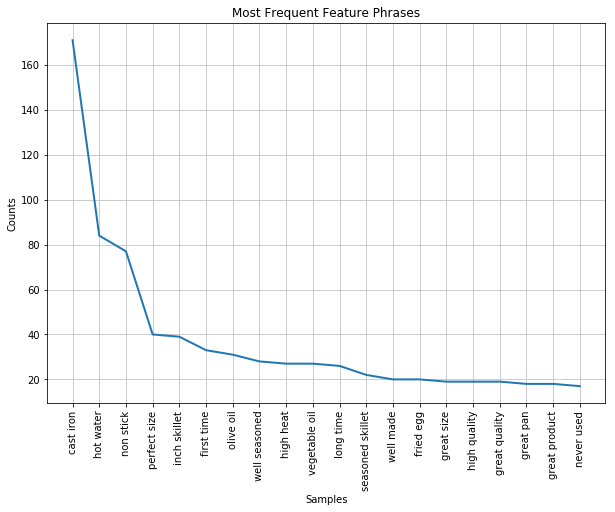

In [90]:
freqdist = nltk.FreqDist(word for word in extracted)
most_common = freqdist.most_common()
print(most_common[:20])
print(freqdist.max())
plt.figure(figsize=(10, 7))  # We want a bigger size plot
freqdist.plot(20, title = "Most Frequent Feature Phrases", cumulative = False)

In [91]:
freqdist.pprint(maxlen = 20)

FreqDist({'cast iron': 171, 'hot water': 84, 'non stick': 77, 'perfect size': 40, 'inch skillet': 39, 'first time': 33, 'olive oil': 31, 'well seasoned': 28, 'high heat': 27, 'vegetable oil': 27, 'long time': 26, 'seasoned skillet': 22, 'well made': 20, 'fried egg': 20, 'great size': 19, 'high quality': 19, 'great quality': 19, 'great pan': 18, 'great product': 18, 'never used': 17, ...})


Most common positive and negative phrases

In [92]:
# Positive
freqdist_pos = nltk.FreqDist(word for word in extracted_pos)
most_common_pos = freqdist_pos.most_common(50)
print(most_common_pos[:10])
print(freqdist_pos.max())
freq_tab_pos = freqdist_pos.tabulate

[('cast iron', 92), ('non stick', 24), ('hot water', 22), ('great pan', 18), ('inch skillet', 17), ('seasoned skillet', 17), ('first time', 16), ('high heat', 15), ('well seasoned', 14), ('great skillet', 14)]
cast iron


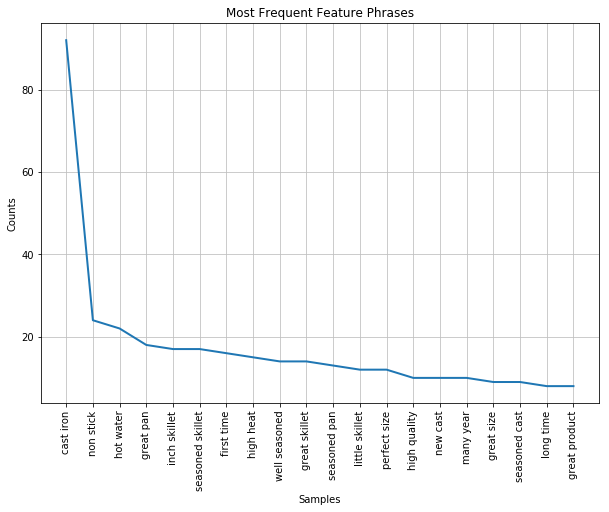

In [93]:
plt.figure(figsize=(10, 7))  # We want a bigger size plot
freqdist_pos.plot(20, title = "Most Frequent Feature Phrases", cumulative = False)

In [94]:
# Negative
freqdist_neg = nltk.FreqDist(word for word in extracted_neg)
most_common_neg = freqdist_neg.most_common()
print(most_common_neg[:10])
print(freqdist_neg.max())
freq_tab_neg = freqdist_neg.tabulate(6)

[('cast iron', 71), ('non stick', 19), ('inch skillet', 17), ('hot water', 14), ('used pan', 11), ('stick pan', 10), ('olive oil', 7), ('iron skillet', 7), ('bought pan', 7), ('used cast', 7)]
cast iron
   cast iron    non stick inch skillet    hot water     used pan    stick pan 
          71           19           17           14           11           10 


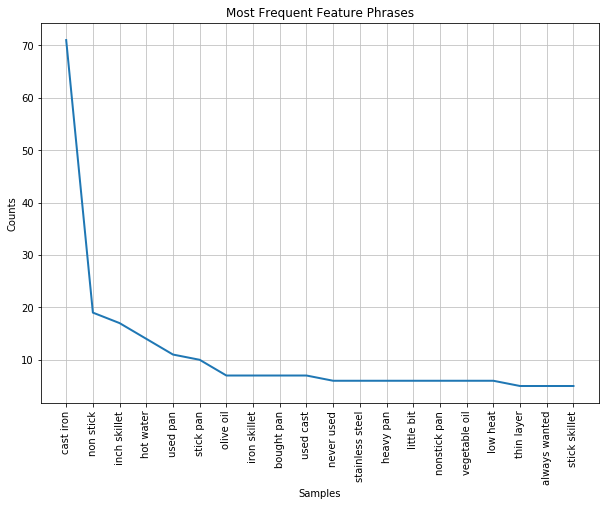

In [95]:
plt.figure(figsize=(10, 7))  # We want a bigger size plot
freqdist_neg.plot(20, title = "Most Frequent Feature Phrases", cumulative = False)

In [128]:
freqdist_neg

FreqDist({'cast iron': 71, 'non stick': 19, 'inch skillet': 17, 'hot water': 14, 'used pan': 11, 'stick pan': 10, 'olive oil': 7, 'iron skillet': 7, 'bought pan': 7, 'used cast': 7, ...})

Unlemmatize and unstem using the dictionary created earlier

In [97]:
import inflect

In [98]:
def getRealWordsF(phrases):
    """ Unlemmatize and unstem using the dictionary created earlier """
    p = inflect.engine()
    new_phrases=[]
    for a in tqdm(phrases):
        newword="";
        found=False;
        for b in a[0].split():
            for x in lem_word_mapping:
                #print(x)
                #print(b)
                if b==x:
                    found=True
                    sing=(lem_word_mapping[x] if p.singular_noun(lem_word_mapping[x])==False else p.singular_noun(lem_word_mapping[x]))
                    if newword=="":
                        newword = newword + sing
                    else:
                        newword = newword + " " +  sing
            if found==False:
                if newword=="":
                    newword = newword + b
                else:
                    newword = newword + " " +  b
                    #print(newword)
        new_phrases.append((newword,a[1]))
    return new_phrases

In [99]:
def getRealWords(phrases):
    """ Unlemmatize and unstem using the dictionary created earlier """
    p = inflect.engine()
    new_phrases=[]
    for a in tqdm(phrases):
        newword="";
        found=False;
        for b in a.split():
            for x in lem_word_mapping:
                #print(x)
                #print(b)
                if b==x:
                    found=True
                    sing=(lem_word_mapping[x] if p.singular_noun(lem_word_mapping[x])==False else p.singular_noun(lem_word_mapping[x]))
                    if newword=="":
                        newword = newword + sing
                    else:
                        newword = newword + " " +  sing
            if found==False:
                if newword=="":
                    newword = newword + b
                else:
                    newword = newword + " " +  b
                    #print(newword)
        new_phrases.append(newword)
    return new_phrases

In [100]:
extracted_pos

['amazing skillet',
 'familiar cast',
 'give minimal',
 'finished product',
 'nice piece',
 'cast iron',
 'true cast',
 'nice piece',
 'cast iron',
 'non stick',
 'first fillet',
 'realized actually',
 'suited cut',
 'perfectly seared',
 'red interior',
 'great pan',
 'full steak',
 'never used',
 'well seasoned',
 'happy achieve',
 'properly cared',
 'professional cook',
 'pan regularly',
 'deep frying',
 'heavy pan',
 'whole pan',
 'cast iron',
 'long time',
 'great product',
 'fantastic skillet',
 'great size',
 'skillet pure',
 'explosive flavor',
 'heavy hell',
 'hot hold',
 'standard skillet',
 'easy burn',
 'stir food',
 'never cooked',
 'nice cookware',
 'keep clean',
 'perfect shape',
 'inch cast',
 'pitted food',
 'side effect',
 'well seasoned',
 'easily fixed',
 'solid skillet',
 'first time',
 'bought skillet',
 'really happy',
 'lodge cast',
 'bacon grease',
 'oven heated',
 'let cool',
 'couple time',
 'used skillet',
 'produced lot',
 'seasoned time',
 'clean cast',
 'w

In [101]:
# final = replacewords(most_common)
# final_pos = replacewords(most_common_pos)
# final_neg = replacewords(most_common_neg)

In [130]:
final = getRealWords(extracted)
final_pos = getRealWords(extracted_pos)
final_neg = getRealWords(extracted_neg)

100%|██████████| 2094/2094 [00:00<00:00, 7311.76it/s]


In [134]:
final_pos

['amazing skillet',
 'familiar cast',
 'give minimal',
 'finished product',
 'nice piece',
 'cast iron',
 'true cast',
 'nice piece',
 'cast iron',
 'non stick',
 'first fillet',
 'realized actually',
 'suited cut',
 'perfectly seared',
 'red interior',
 'great pan',
 'full steak',
 'never used',
 'well seasoned',
 'happy achieve',
 'properly cared',
 'professional cook',
 'pan',
 'deep frying',
 'heavy pan',
 'whole pan',
 'cast iron',
 'long time',
 'great product',
 'fantastic skillet',
 'great size',
 'skillet',
 'explosive flavor',
 'heavy hell',
 'hot hold',
 'standard skillet',
 'easy burn',
 'stir food',
 'never cooked',
 'nice cookware',
 'keep clean',
 'perfect shape',
 'inch',
 'pitted food',
 'side effect',
 'well seasoned',
 'easily fixed',
 'solid skillet',
 'first time',
 'bought skillet',
 'really happy',
 'lodge',
 'bacon grease',
 'oven',
 'let cool',
 'couple time',
 'used skillet',
 'produced lot',
 'seasoned time',
 'clean',
 'warm dump',
 'clean',
 'free cloth',
 

[('cast iron', 92), ('good', 59), ('non stick', 24), ('hot water', 22), ('pan', 19), ('clean', 19), ('stick', 19), ('great pan', 18), ('inch skillet', 17), ('seasoned skillet', 17)]


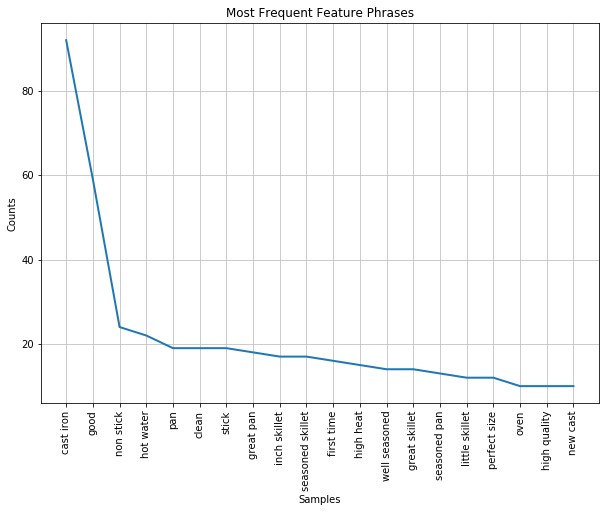

In [133]:
# Positive
freqdist_pos = nltk.FreqDist(word for word in final_pos)
most_common_pos = freqdist_pos.most_common(50)
print(most_common_pos[:10])
plt.figure(figsize=(10, 7))  # We want a bigger size plot
freqdist_pos.plot(20, title = "Most Frequent Feature Phrases", cumulative = False)

[('cast iron', 71), ('non stick', 19), ('inch skillet', 17), ('pan', 16), ('hot water', 14), ('used pan', 11), ('stick pan', 10), ('dry', 8), ('olive oil', 7), ('stick', 7)]


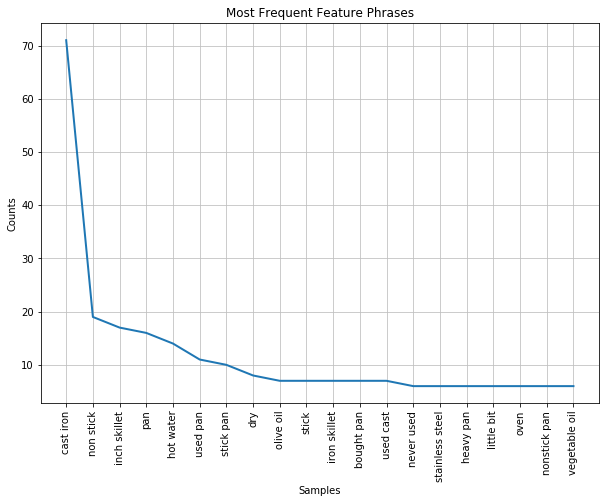

In [137]:
# Positive
freqdist_neg = nltk.FreqDist(word for word in final_neg)
most_common_neg = freqdist_neg.most_common(50)
print(most_common_neg[:10])
plt.figure(figsize=(10, 7))  # We want a bigger size plot
freqdist_neg.plot(20, title = "Most Frequent Feature Phrases", cumulative = False)

In [138]:
freqdist_neg['cast iron']

71

### TF-IDF for the extracted phrases

In [104]:
# bi-gram and tri-gram features that are also our extracted phrases
extracted_df_pos = names_scores_df_pos[names_scores_df_pos.feature_names.isin(final_pos)]
extracted_df_pos['freq'] = pd.DataFrame(phrase_scores_pos) 
extracted_df_pos.size

2372

In [139]:
extracted_df_pos['freq'] = extracted_df_pos.apply(lambda row: freqdist_pos[row.feature_names], axis=1)

/Users/gkhanna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [140]:
extracted_df_pos.head()

,feature_names,phrase_scores,freq
1592,absolute requirement,7.237348,1
1600,absolutely blown,7.237348,1
1604,absolutely delicious,7.237348,1
1734,acidic product,7.237348,1
1786,actual heirloom,7.237348,1


In [142]:
extracted_df_pos.sort_values(by='phrase_scores', ascending=True)

,feature_names,phrase_scores,freq
18990,cast iron,1.627876,92
49243,iron skillet,2.726488,7
67323,non stick,2.824549,24
80399,pre seasoned,2.874249,3
45180,hot water,3.667815,22
78784,perfect size,4.080347,12
96742,stove top,4.146305,2
94759,stainless steel,4.346976,7
47537,inch skillet,4.346976,17
44527,highly recommend,4.404134,1


In [107]:
len(final_neg)

2094

In [108]:
extracted_df_neg = names_scores_df_neg[names_scores_df_neg.feature_names.isin(final_neg)]
extracted_df_neg.size

180

In [109]:
print("Top Feature Phrases:")
print(final[0])
print(final[:50])
print("Top Positive Feature Phrases:")
print(final_pos[0])
print(final_pos[:50])
print("Top Negative Feature Phrases:")
print(final_neg[0])
print(final_neg[:50])

Top Feature Phrases:
stick pan
['stick pan', 'cast iron', 'unknown chemical', 'last decade', 'amazing skillet', 'always bought', 'regular lodge', 'went pre', 'seasoned time', 'wanted size', 'big box', 'whole batch', 'badly pre', 'got hand', 'really rusty', 'soapy water', 'never seen', 'much rust', 'come skillet', 'badly stored', 'used cast', 'lodge skillet', 'big cast', 'messy hassle', 'got cook', 'priced well', 'good quality', 'skillet', 'saute', 'performed well', 'much use', 'negative review', 'pan rust', 'familiar cast', 'give minimal', 'finished product', 'nice piece', 'cast iron', 'proplery finish', 'true cast', 'nice piece', 'cast iron', 'non stick', 'spend time', 'finish pan', 'used pan', 'small layer', 'preheated oven', 'followed steak', 'added layer']
Top Positive Feature Phrases:
amazing skillet
['amazing skillet', 'familiar cast', 'give minimal', 'finished product', 'nice piece', 'cast iron', 'true cast', 'nice piece', 'cast iron', 'non stick', 'first fillet', 'realized actu

We'll find out the opinions corresponding to the most common features.
Its a simple search in a bunch of lists/files at this point

In [110]:
def featuresInContext(item_arr, opinion_phrases, sentence_arr ):
    for item,support in tqdm(sorted(item_arr, key=lambda item_support: item_support[1], reverse=True)):
        count = 0
        print("------" + "Item > " + item[0] + "------")
        for phrase, freq in sorted(opinion_phrases, key = lambda phrase_freq: phrase_freq[1], reverse = True):
            pcount = 0
            if normalise(item[0]) in normalise(phrase):
                count+=1
                print("---" + "Phrase > " + phrase + "----")
                for l in sentence_arr:
                    if normalise(phrase) in normalise(l):
                        # print("Debug: " + l)
                        for b in zip(l.split(" ")[:-1], l.split(" ")[1:]):
                            #print(b[0]+" "+b[1])
                            if normalise(b[0])==normalise(item[0]):
                                print("---" + "examplex" + "----")
                                print(l.replace("'","").replace("]","").replace("[",""))
                                pcount+=1
                                break
                            elif (normalise(b[0])+" "+normalise(b[1]))==normalise(item[0]):
                                print("---" + "exampley" + "----")
                                print(l.replace("'","").replace("]","").replace("[",""))
                                pcount+=1
                                break
                        if pcount==4:
                            break                
            if count==4:
                break 
        
# sent_str = ""
# sent_str = sent_str.join(sent_fullreview)
# token_sentences = sent_tokenizer1.tokenize(sent_str)
# featuresInContext(items, final, sent_fullreview)

In [111]:
def featuresInContextA(item_arr, opinion_phrases, sentence_arr ):
    for item,support in tqdm(sorted(item_arr, key=lambda item_support: item_support[1], reverse=True)):
        count = 0
        print("------" + "Item > " + item[0] + "------")
        for phrase, freq in sorted(opinion_phrases, key = lambda phrase_freq: phrase_freq[1], reverse = True):
            pcount = 0
            count+=1
            print("---" + "Phrase > " + str(count) + " >>> " + phrase + "----")
            for l in sentence_arr:
                if (normalise(phrase) in normalise(l)) and (normalise(item[0]) in normalise(l)):
                    pcount+=1
                    print("---" + "example > " + str(pcount) + " >>> " + "----")
                    print(l)
                    if pcount==4:
                        break                
            if count==4:
                break 
        
              

In [112]:
def featuresInContextB(item_arr, opinion_phrases, sentence_arr ):
    # Count of the phrases
    count = 0
    # Latest time in a string
    timestr = time.strftime("%Y%m%d-%H%M%S")
    # Outputfile
    print("File created at: " + timestr)
    output_file_name = "o_" + timestr + ".txt"
    f= open(output_file_name,"a+")
    # Go through the phrases and print sentences that contain them
    for phrase, freq in sorted(opinion_phrases, key = lambda phrase_freq: phrase_freq[1], reverse = True):
        # Count of the number of sentences
        pcount = 0
        count+=1
        f.write("\r\n")
        f.write("---" + "Phrase > " + str(count) + " >>> " + phrase + "----\r\n\r\n")
        for l in sentence_arr:
            if normalise(phrase) in normalise(l):
                pcount+=1
                f.write("---" + "example > " + str(pcount) + " >>> " + "----\r\n")
                f.write("%s\r\n" %(l))
                if pcount==5:
                    break                
        if count==5:
            break 
    f.close()

Modified to function without the item. Its assumed that the reviews are already constrained by the item in this case

In [113]:
def featuresInContextC(opinion_phrases, sentence_arr ):
    count = 0
    for phrase, freq in sorted(opinion_phrases, key = lambda phrase_freq: phrase_freq[1], reverse = True):
        pcount = 0
        count +=1
        print("---" + "Phrase > " + str(count) + " >>> " + phrase + "----")
        for l in sentence_arr:            
            if normalise(phrase) in normalise(l):
                pcount +=1
                print("---" + "example > " + str(pcount) + " >>> " + "----")
                print(l)
                
                if pcount == 4:
                    break
        if count == 4:
            break
              

In [114]:
# Extract sentences with features
from collections import defaultdict
def featuresAndContextOld(item_arr, opinion_phrases, sentence_arr, phrase_count, sentence_count ):
    """ Extract sentences with features/opinion_phrases
    item_arr is to constrain the context to items under study
    Output is extracted into a file
    Output is also return as a JSON string
    """


    # Latest time in a string
    timestr = time.strftime("%Y%m%d-%H%M%S")

    # Outputfile
    print("File created at: " + timestr)
    output_file_name = "o_" + timestr + ".txt"
    output_json_name = "o_" + timestr + ".json"

    f= open(output_file_name,"a+")

    # Output JSON
    outDict = defaultdict(list)
    outJSON = ''

    p_count = 0
    # Go through the phrases and print sentences that contain them
    for phrase, freq in sorted(opinion_phrases, key = lambda phrase_freq: phrase_freq[1], reverse = True):

        f.write("\r\n")
        f.write("---" + "Phrase > " + str(p_count) + " >>> " + phrase + "----\r\n\r\n")
        p_count += 1
        s_count = 0
        for l in sentence_arr:
            if normalise(phrase) in normalise(l):
                f.write("---" + "example > " + str(s_count) + " >>> " + "----\r\n")
                f.write("%s\r\n" %(l))
                outDict[phrase].append(l)
                s_count += 1
                if s_count == sentence_count:
                    break
        if p_count == phrase_count:
            break
    outJSON = json.dumps(outDict, sort_keys = True, indent = 4)
    with open(output_json_name, 'w') as jf:
        json.dump(outDict, jf, sort_keys = True, indent=4)

    f.close()
    return output_file_name, output_json_name, outJSON


In [115]:
def featuresAndContext(item_arr, opinion_phrases, sentence_arr, phrase_count, sentence_count ):
    """ Extract sentences with features/opinion_phrases
    item_arr is to constrain the context to items under study
    Output is returned as a JSON string
    """

    # Output JSON
    outDict = defaultdict(list)
    outJSON = ''

    p_count = 0
    # Go through the phrases and print sentences that contain them
    for phrase, freq in sorted(opinion_phrases, key = lambda phrase_freq: phrase_freq[1], reverse = True):

        # f.write("\r\n")
        # f.write("---" + "Phrase > " + str(p_count) + " >>> " + phrase + "----\r\n\r\n")
        p_count += 1
        s_count = 0
        for l in sentence_arr:
            if normalise(phrase) in normalise(l):
                # f.write("---" + "example > " + str(s_count) + " >>> " + "----\r\n")
                # f.write("%s\r\n" %(l))
                outDict[phrase].append(l)
                s_count += 1
                if s_count == sentence_count:
                    break
        if p_count == phrase_count:
            break
    outJSON = json.dumps(outDict, sort_keys = True, indent = 4)
    # with open(output_json_name, 'w') as jf:
        # json.dump(outDict, jf, sort_keys = True, indent=4)

    # f.close()
    return outJSON

In [116]:
print(items)

[(('skillet',), 0.16864929980424634), (('cast',), 0.11940972745068514), (('pan',), 0.20418611654871255), (('iron',), 0.16051799427797017), (('iron', 'cast'), 0.11775335039903628)]


Sort by support

In [117]:
items.sort(key=lambda tup: tup[1], reverse=True) 

In [118]:
print(items)

[(('pan',), 0.20418611654871255), (('skillet',), 0.16864929980424634), (('iron',), 0.16051799427797017), (('cast',), 0.11940972745068514), (('iron', 'cast'), 0.11775335039903628)]


In [119]:
# featuresInContextB(items, final_pos, sent_pos_review)

In [120]:
# featuresInContextB(items, final_neg, sent_neg_review)

In [121]:
# Latest time in a string
timestr = time.strftime("%Y%m%d-%H%M%S")
# Outputfile
print("Files created at: " + timestr)
output_file_pos = "o_" + "pos_" + timestr + ".json"
output_file_neg = "o_" + "neg_" + timestr + ".json"

Files created at: 20190804-111726


In [135]:
# featuresAndContext(item_arr, opinion_phrases, sentence_arr, phrase_count, sentence_count )
    # Getting sentences with the positive phrases
out_json_s_pos = featuresAndContext(items, most_common_pos, sent_pos_review, 10, 10)
with open(output_file_pos, 'w') as jf:
    jf.write(out_json_s_pos)
print("Pos phrases written to: " + output_file_pos)

Pos phrases written to: o_pos_20190804-111726.json


In [136]:
# Getting sentences with the negative phrases
out_json_s_neg = featuresAndContext(items, most_common_neg, sent_neg_review, 10, 10)
with open(output_file_neg, 'w') as jfn:
    jfn.write(out_json_s_neg)
print("Neg phrases written to: " + output_file_neg)

Neg phrases written to: o_neg_20190804-111726.json
